In [1]:
# Importing all the essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [9]:
# Importing Stock market data from the Internet

from pandas_datareader import data as pdr
import yfinance as yf

# Fetch stock data for Apple (AAPL)
df = yf.download('AAPL', start='2022-01-01', end='2022-12-31')
print(df.head())



[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.273605   
2022-01-04  182.630005  182.940002  179.119995  179.699997  176.998352   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.290207   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.414108   
2022-01-07  172.889999  174.139999  171.029999  172.169998  169.581558   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


In [10]:
# Importing datetime for setting start and end date of the stock market dataset

from datetime import datetime

In [11]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [13]:
# Importing Apple Stock Prices

AAPL = yf.download('AAPL', start=start, end=end)
print(AAPL.head())

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-11  180.070007  180.300003  177.339996  179.360001  178.446869   
2023-09-12  179.490005  180.130005  174.820007  176.300003  175.402451   
2023-09-13  176.509995  177.300003  173.979996  174.210007  173.323090   
2023-09-14  174.000000  176.100006  173.580002  175.740005  174.845306   
2023-09-15  176.479996  176.500000  173.820007  175.009995  174.119019   

               Volume  
Date                   
2023-09-11   58953100  
2023-09-12   90370200  
2023-09-13   84267900  
2023-09-14   60895800  
2023-09-15  109205100  


In [14]:
# Some Basic info about the Apple Stock

AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,191.401245,193.179605,189.767352,191.542095,191.043865,5.924818e+07
std,19.036111,19.288086,18.617909,18.971188,19.150386,2.503223e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,6.495715e+06
25%,175.570007,177.490005,173.979996,175.740005,174.845306,4.567930e+07
50%,187.699997,189.139999,186.300003,187.440002,186.970505,5.310390e+07
75%,198.020004,207.160004,196.160004,207.149994,206.910492,6.567270e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


<Axes: xlabel='Date'>

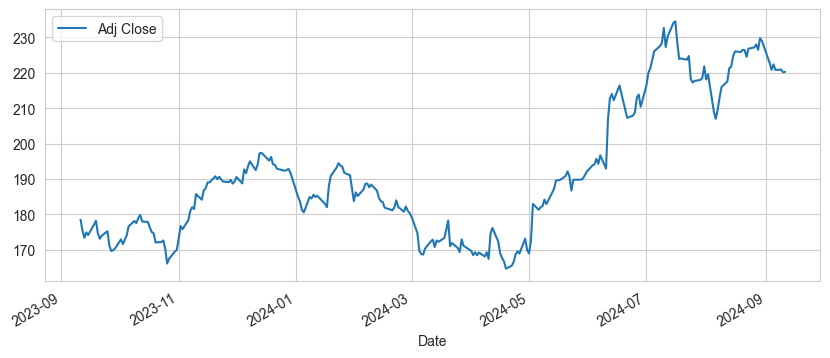

In [15]:
# Plotting Adjusted Closing price for Apple Stock

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

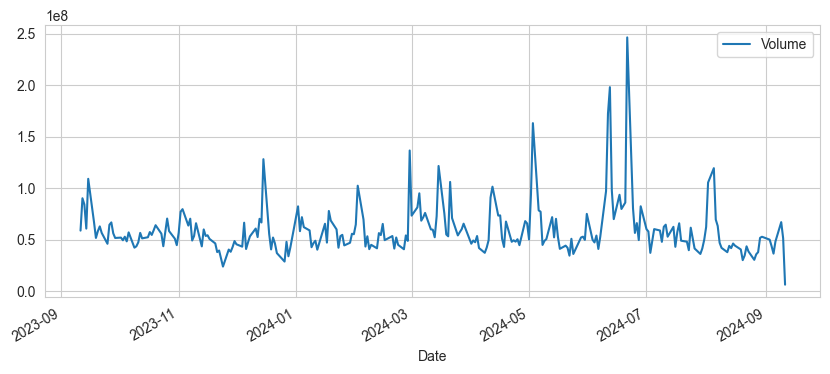

In [16]:
# Plotting the total volume of stock being traded each day

AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [18]:
# Calculating Moving average for 10, 20 and 50 days of the stock price

# Define moving average days
ma_day = [10, 20, 50]

# Calculate moving averages
for ma in ma_day:
    column_name = f"MA for {ma} days"
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<Axes: xlabel='Date'>

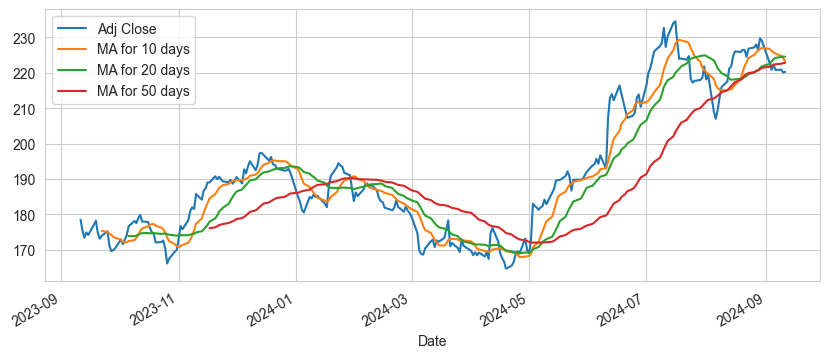

In [19]:
# Plotting the moving averages

AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<Axes: xlabel='Date'>

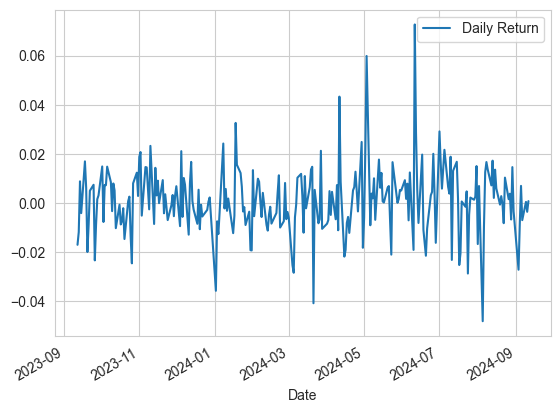

In [20]:
# Plotting Daily returns as a function of Percent change in Adjusted Close value

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True)

C:\Users\princ\AppData\Local\Temp\ipykernel_22920\2928551292.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100)


<Axes: xlabel='Daily Return', ylabel='Density'>

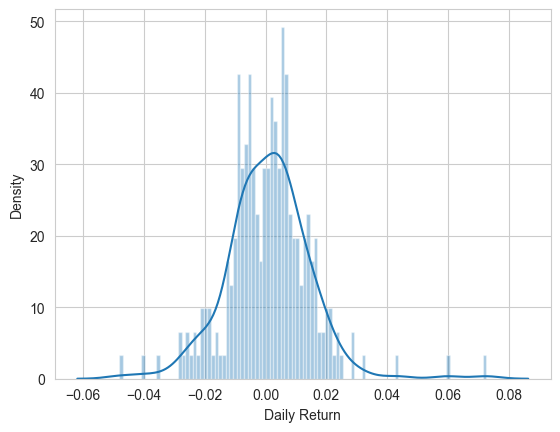

In [21]:
# Plotting the average daily returns of the stock

sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

Text(0, 0.5, 'Risk')

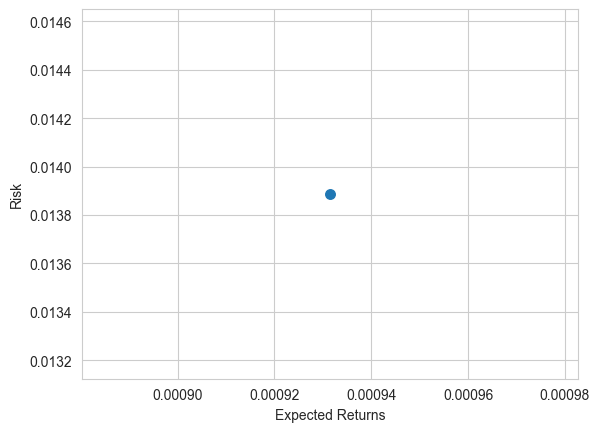

In [22]:
# Risk Analysis --  Comparing the Risk vs Expected returns

rets = AAPL['Daily Return'].dropna()

area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

In [17]:
# Visualizing the Value at Risk

sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [23]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

AAPL['Daily Return'].quantile(0.05)

-0.021262760199520513

In [24]:
## Monte Carlo Simulation

days = 365

dt = 1/days

mu = rets.mean()

sigma = rets.std()

In [25]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [26]:


AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2023-09-11,180.070007,180.300003,177.339996,179.360001,178.446869,58953100,NaN,NaN,NaN,NaN
2023-09-12,179.490005,180.130005,174.820007,176.300003,175.402451,90370200,NaN,NaN,NaN,-0.017061
2023-09-13,176.509995,177.300003,173.979996,174.210007,173.323090,84267900,NaN,NaN,NaN,-0.011855
2023-09-14,174.000000,176.100006,173.580002,175.740005,174.845306,60895800,NaN,NaN,NaN,0.008783
2023-09-15,176.479996,176.500000,173.820007,175.009995,174.119019,109205100,NaN,NaN,NaN,-0.004154


Text(0.5, 1.0, 'Monte Carlo Simulation for Apple')

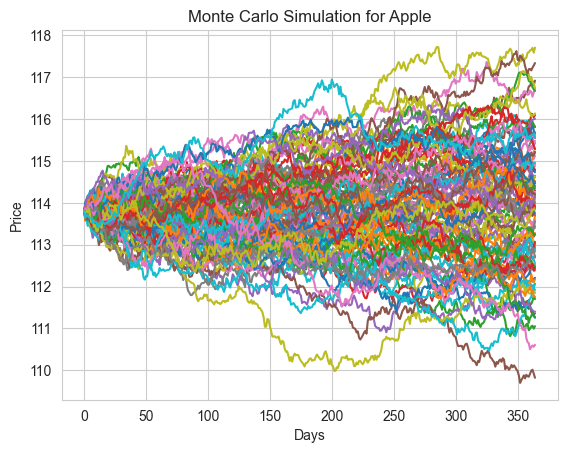

In [27]:
# Running the Monte Carlo simulation a hundred times

start_price = 113.790001

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Apple')

In [28]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

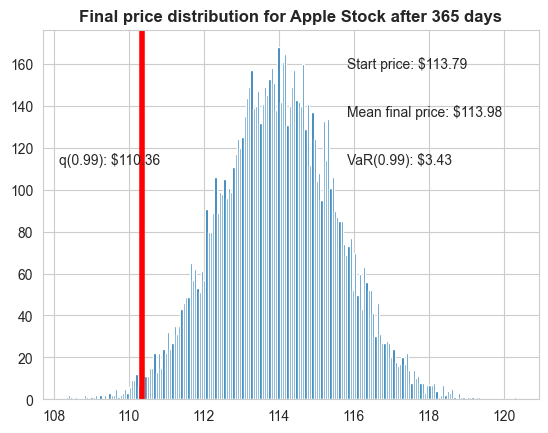

In [29]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');